
**PyTorch**: is an open-source machine learning library developed by Facebook. It provides a flexible and dynamic computational graph, allowing developers to build and train neural networks efficiently.


<p align="center"><strong> Dataset description and task description</strong></p>

Our main goal is to classifier accurately the 10 charaters from the dataset KMNIST( Kuzushiji-MNIST dataset) what is the replacement for the standard MINST digits recognition dataset. It's consist of 70.000 images with 60.000 for training and 10.000 for testing.

### **Implementing a Convolutional Neural Network (CNN) with PyTorch**

1. The following lines guide us to install some requirement libraries or module: **PyTorch**, **OpenCV**, and **scikit-learn**.

In [ ]:
#uncomment if Necessary

# !pip install torch torchvision
# !pip install opencv-contrib-python
# !pip install scikit-learn



2. Importing necessary modules and
classes from PyTorch's neural network module



In [ ]:
# import the necessary packages

from torch.nn import Module  # Base class for all neural network modules
from torch.nn import Conv2d  # 2D convolutional layer
from torch.nn import Linear  # Fully connected layer
from torch.nn import MaxPool2d # 2D max pooling layer
from torch.nn import ReLU     # Rectified Linear Unit activation function
from torch.nn import LogSoftmax # Logarithmic Softmax activation function
from torch import flatten # Flatten function to reshape input tensors

3. Implementation of  **LeNet model architecture** for image classification.

**Arguments**:

*   numChannels: Number of input channels
*   classes: Number of output classes

**Architecture**:



*   Convolutional layer (conv1) with ReLU activation and max pooling.
*   Convolutional layer (conv2) with ReLU activation and max pooling.



*   Fully connected layer (fc1) with ReLU activation
*   Fully connected layer (fc2) with LogSoftmax activation.

**Parameters**:


*   in_channels: Input channels for the first convolutional layer.
*   out_channels: Output channels for convolutional layers.



*   kernel_size: Size of the convolutional kernel.
*   stride: Stride for max pooling layers.

*   in_features: Input features for fully connected layers.
*   out_features: Output features for fully connected layers.


For the **forward method** we have:

**Arguments**:



*   x: Input tensor.

**Returns:**

*   Output predictions after passing through the network.

In [ ]:
class LeNet(Module):

  def __init__(self, numChannels, classes):
    #call the parent constructor
    super(LeNet, self).__init__()
    # initialize first set of CONV => RELU => POOL layers
    self.conv1 = Conv2d(in_channels=numChannels, out_channels=20,
        kernel_size=(5, 5))
    self.relu1 = ReLU()
    self.maxpool1 = MaxPool2d(kernel_size=(2, 2), stride=(2, 2))
    # initialize second set of CONV => RELU => POOL layers
    self.conv2 = Conv2d(in_channels=20, out_channels=50,
        kernel_size=(5, 5))
    self.relu2 = ReLU()
    self.maxpool2 = MaxPool2d(kernel_size=(2, 2), stride=(2, 2))
    # initialize first (and only) set of FC => RELU layers
    self.fc1 = Linear(in_features=800, out_features=500)
    self.relu3 = ReLU()
    # initialize our softmax classifier
    self.fc2 = Linear(in_features=500, out_features=classes)
    self.logSoftmax = LogSoftmax(dim=1)

  def forward(self, x):
      # pass the input through our first set of CONV => RELU =>
      # POOL layers
      x = self.conv1(x)
      x = self.relu1(x)
      x = self.maxpool1(x)
      # pass the output from the previous layer through the second
      # set of CONV => RELU => POOL layers
      x = self.conv2(x)
      x = self.relu2(x)
      x = self.maxpool2(x)
      # flatten the output from the previous layer and pass it
      # through our only set of FC => RELU layers
      x = flatten(x, 1)
      x = self.fc1(x)
      x = self.relu3(x)
      # pass the output to our softmax classifier to get our output
      # predictions
      x = self.fc2(x)
      output = self.logSoftmax(x)
      # return the output predictions
      return output

### **Creating and Training our CNN training script with PyTorch**

1. Importing libraries and modules that will be used for tasks such as machine learning, data processing, and visualization.

This block imports various Python packages and modules:

1. **classification_report**: Importing a function from scikit-learn for generating classification reports.

2. **random_split**: Importing a function from PyTorch for splitting datasets randomly.

3. **DataLoader**: Importing a class from PyTorch for creating data loaders.

4. **ToTensor**: Importing a transformation from torchvision to convert images to PyTorch tensors.

5. **KMNIST**: Importing the KMNIST dataset from torchvision.

6. **Adam**: Importing the Adam optimizer from PyTorch.

7. **nn**: Importing the neural network module from PyTorch.

8. **torch**: Importing the PyTorch library.
9. **time**: Importing the time module.


In [ ]:
# set the matplotlib backend so figures can be saved in the background

import matplotlib
matplotlib.use("Agg")
# import the necessary packages

# from pyimagesearch.lenet import LeNet
from sklearn.metrics import classification_report
from torch.utils.data import random_split
from torch.utils.data import DataLoader
from torchvision.transforms import ToTensor
from torchvision.datasets import KMNIST
from torch.optim import Adam
from torch import nn
import matplotlib.pyplot as plt
import numpy as np
# import argparse
import torch
import time

2. Training hyperparameters and configurations.

Training hyperparameters:

* **INIT_LR**: It represents the initial learning rate for the optimizer, indicating how much the model's parameters should be adjusted during training.

* **BATCH_SIZE**: This hyperparameter determines the number of samples processed in each iteration (batch) during training. It affects the efficiency of model training.

* **EPOCHS**: It defines the number of times the entire dataset is processed during training. One epoch represents one complete pass through the training data.

Define the train and val splits:

   **TRAIN_SPLIT** and **VAL_SPLIT**: These variables specify the proportions of the dataset allocated for training and validation, respectively. In this case, 75% of the data is used for training, and the remaining 25% for validation.

Set the device we will be using to train the model:

**device**: This variable determines the computing device (CPU or GPU) that will be used for training the model. If a GPU is available (torch.cuda.is_available() is True), it uses the GPU; otherwise, it falls back to using the CPU.

In [ ]:
# define training hyperparameters
INIT_LR = 1e-3
BATCH_SIZE = 64
EPOCHS = 10
# define the train and val splits
TRAIN_SPLIT = 0.75
VAL_SPLIT = 1 - TRAIN_SPLIT
# set the device we will be using to train the model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


3. Loading the KMNIST dataset, preparing it for training and validation, and generating the train/validation split:

* **random_split**: This function from PyTorch is used to randomly split the training dataset into training and validation subsets.
trainData: The original training dataset.

* **[numTrainSamples, numValSamples]:** A list specifying the number of samples for the training and validation subsets.

* **generator=torch.Generator().manual_seed(42):** Setting a seed for the random number generator ensures reproducibility of the split. The seed value here is 42.
The resulting datasets (**trainData** and **valData**) will be used for training and validation.

In [ ]:
# load the KMNIST dataset
print("[INFO] loading the KMNIST dataset...")
trainData = KMNIST(root="data", train=True, download=True,
	transform=ToTensor())
testData = KMNIST(root="data", train=False, download=True,
	transform=ToTensor())
# calculate the train/validation split
print("[INFO] generating the train/validation split...")
numTrainSamples = int(len(trainData) * TRAIN_SPLIT)
numValSamples = int(len(trainData) * VAL_SPLIT)
(trainData, valData) = random_split(trainData,
	[numTrainSamples, numValSamples],
	generator=torch.Generator().manual_seed(42))

[INFO] loading the KMNIST dataset...


100%|██████████| 18165135/18165135 [00:06<00:00, 2661135.62it/s]


Extracting data/KMNIST/raw/train-images-idx3-ubyte.gz to data/KMNIST/raw



100%|██████████| 29497/29497 [00:00<00:00, 378979.53it/s]


Extracting data/KMNIST/raw/train-labels-idx1-ubyte.gz to data/KMNIST/raw



100%|██████████| 3041136/3041136 [00:01<00:00, 2082406.67it/s]


Extracting data/KMNIST/raw/t10k-images-idx3-ubyte.gz to data/KMNIST/raw



100%|██████████| 5120/5120 [00:00<00:00, 24320313.11it/s]

Extracting data/KMNIST/raw/t10k-labels-idx1-ubyte.gz to data/KMNIST/raw

[INFO] generating the train/validation split...


4. Initializing data loaders for the training, validation, and test datasets, along with calculating the steps per epoch for the training and validation sets

**DataLoader**: This class from PyTorch is used to create iterators for the datasets, allowing you to iterate through batches during training and evaluation:

* **trainDataLoader**: The DataLoader for the training dataset with shuffling enabled (shuffle=True). It randomly shuffles the data to introduce variability in each epoch.
* **valDataLoader**: The DataLoader for the validation dataset without shuffling, as shuffling is unnecessary during validation.
* **testDataLoader**: The DataLoader for the test dataset without shuffling.

In [ ]:
# initialize the train, validation, and test data loaders
trainDataLoader = DataLoader(trainData, shuffle=True,
	batch_size=BATCH_SIZE)
valDataLoader = DataLoader(valData, batch_size=BATCH_SIZE)
testDataLoader = DataLoader(testData, batch_size=BATCH_SIZE)
# calculate steps per epoch for training and validation set
trainSteps = len(trainDataLoader.dataset) // BATCH_SIZE
valSteps = len(valDataLoader.dataset) // BATCH_SIZE

In [ ]:
# initialize the LeNet model
print("[INFO] initializing the LeNet model...")
model = LeNet(
	numChannels=1,
	classes=len(trainData.dataset.classes)).to(device)
# initialize our optimizer and loss function
opt = Adam(model.parameters(), lr=INIT_LR)
lossFn = nn.NLLLoss()
# initialize a dictionary to store training history
H = {
	"train_loss": [],
	"train_acc": [],
	"val_loss": [],
	"val_acc": []
}
# measure how long training is going to take
print("[INFO] training the network...")
startTime = time.time()

[INFO] initializing the LeNet model...
[INFO] training the network...


5. Training loop over the specified number of epochs. It includes the forward, backpropagation, optimization, and evaluation on both the training and validation sets:

* The outer loop iterates over the specified number of epochs (**EPOCHS**).

* The model is set to training mode (**model.train()**), and the training loop begins. The inner loop iterates over batches from the training DataLoader.

* The feedforward  is performed, and the loss is calculated using the specified loss function (**lossFn**).

* **Gradients** are zeroed, and the backward pass is executed to calculate gradients and update the model weights.

* Training loss and the number of correct predictions are accumulated.

* After the training loop, the model is switched to evaluation mode (**model.eval()**), and the validation loop begins. Similar steps are performed for the validation set, but gradients are not updated during validation.

* Average training and validation losses are calculated, along with training and validation accuracy.

* Training history (**H**) is updated with the calculated values.

* Model training and validation information is printed for each epoch.

In [ ]:
# loop over our epochs
for e in range(0, EPOCHS):
	# set the model in training mode
	model.train()
	# initialize the total training and validation loss
	totalTrainLoss = 0
	totalValLoss = 0
	# initialize the number of correct predictions in the training
	# and validation step
	trainCorrect = 0
	valCorrect = 0
	# loop over the training set
	for (x, y) in trainDataLoader:
		# send the input to the device
		(x, y) = (x.to(device), y.to(device))
		# perform a forward pass and calculate the training loss
		pred = model(x)
		loss = lossFn(pred, y)
		# zero out the gradients, perform the backpropagation step,
		# and update the weights
		opt.zero_grad()
		loss.backward()
		opt.step()
		# add the loss to the total training loss so far and
		# calculate the number of correct predictions
		totalTrainLoss += loss
		trainCorrect += (pred.argmax(1) == y).type(
			torch.float).sum().item()
   # switch off autograd for evaluation
	with torch.no_grad():
		# set the model in evaluation mode
		model.eval()
		# loop over the validation set
		for (x, y) in valDataLoader:
			# send the input to the device
			(x, y) = (x.to(device), y.to(device))
			# make the predictions and calculate the validation loss
			pred = model(x)
			totalValLoss += lossFn(pred, y)
			# calculate the number of correct predictions
			valCorrect += (pred.argmax(1) == y).type(
				torch.float).sum().item()
    # calculate the average training and validation loss
	avgTrainLoss = totalTrainLoss / trainSteps
	avgValLoss = totalValLoss / valSteps
	# calculate the training and validation accuracy
	trainCorrect = trainCorrect / len(trainDataLoader.dataset)
	valCorrect = valCorrect / len(valDataLoader.dataset)
	# update our training history
	H["train_loss"].append(avgTrainLoss.cpu().detach().numpy())
	H["train_acc"].append(trainCorrect)
	H["val_loss"].append(avgValLoss.cpu().detach().numpy())
	H["val_acc"].append(valCorrect)
	# print the model training and validation information
	print("[INFO] EPOCH: {}/{}".format(e + 1, EPOCHS))
	print("Train loss: {:.6f}, Train accuracy: {:.4f}".format(
		avgTrainLoss, trainCorrect))
	print("Val loss: {:.6f}, Val accuracy: {:.4f}\n".format(
		avgValLoss, valCorrect))

[INFO] EPOCH: 1/10
Train loss: 0.007323, Train accuracy: 0.9975
Val loss: 0.081470, Val accuracy: 0.9809

[INFO] EPOCH: 2/10
Train loss: 0.007323, Train accuracy: 0.9975
Val loss: 0.081470, Val accuracy: 0.9809

[INFO] EPOCH: 3/10
Train loss: 0.007329, Train accuracy: 0.9975
Val loss: 0.081470, Val accuracy: 0.9809

[INFO] EPOCH: 4/10
Train loss: 0.007324, Train accuracy: 0.9975
Val loss: 0.081470, Val accuracy: 0.9809

[INFO] EPOCH: 5/10
Train loss: 0.007325, Train accuracy: 0.9975
Val loss: 0.081470, Val accuracy: 0.9809

[INFO] EPOCH: 6/10
Train loss: 0.007323, Train accuracy: 0.9975
Val loss: 0.081470, Val accuracy: 0.9809

[INFO] EPOCH: 7/10
Train loss: 0.007323, Train accuracy: 0.9975
Val loss: 0.081470, Val accuracy: 0.9809

[INFO] EPOCH: 8/10
Train loss: 0.007323, Train accuracy: 0.9975
Val loss: 0.081470, Val accuracy: 0.9809

[INFO] EPOCH: 9/10
Train loss: 0.007323, Train accuracy: 0.9975
Val loss: 0.081470, Val accuracy: 0.9809

[INFO] EPOCH: 10/10
Train loss: 0.007323, Trai

6. Evaluation summary of the model's performance on the test set after training:






* **endTime, startTime**: records the current time (endTime) and calculates the total training time by subtracting the start time (startTime).

* **torch.no_grad()**: Temporarily disable gradient computation.

* **model.eval()**: It then iterates over the test set using the test DataLoader and makes predictions. Predictions are stored in the preds list.

* **classification_report**: compares the true labels (testData.targets.cpu().numpy()) with the predicted labels (np.array(preds)) and prints metrics such as precision, recall, and F1-score for each class. The **target_names** parameter specifies the class names for better readability in the report.

In [ ]:
# finish measuring how long training took
endTime = time.time()
print("[INFO] total time taken to train the model: {:.2f}s".format(
	endTime - startTime))
# we can now evaluate the network on the test set
print("[INFO] evaluating network...")
# turn off autograd for testing evaluation
with torch.no_grad():
	# set the model in evaluation mode
	model.eval()

	# initialize a list to store our predictions
	preds = []
	# loop over the test set
	for (x, y) in testDataLoader:
		# send the input to the device
		x = x.to(device)
		# make the predictions and add them to the list
		pred = model(x)
		preds.extend(pred.argmax(axis=1).cpu().numpy())
# generate a classification report
print(classification_report(testData.targets.cpu().numpy(),
	np.array(preds), target_names=testData.classes))

[INFO] total time taken to train the model: 102.29s
[INFO] evaluating network...
              precision    recall  f1-score   support

           o       0.95      0.96      0.96      1000
          ki       0.95      0.95      0.95      1000
          su       0.93      0.91      0.92      1000
         tsu       0.94      0.98      0.96      1000
          na       0.98      0.90      0.94      1000
          ha       0.97      0.93      0.95      1000
          ma       0.90      0.98      0.94      1000
          ya       0.96      0.95      0.95      1000
          re       0.97      0.97      0.97      1000
          wo       0.94      0.97      0.96      1000

    accuracy                           0.95     10000
   macro avg       0.95      0.95      0.95     10000
weighted avg       0.95      0.95      0.95     10000



**Repport**:
* Training time: 102.29s on T4 GPU,
* Training accuracy: 99.75%,
* validation accuracy: 98,09%,
* Test accuracy: 95%

The next figure above shows that, the training history plot is smooth.

* Train loss: 0.007323,
* Val loss: 0.081470,

We can deduce that the model is little overfitting

7.  Visualizes the training and validation performance over epochs, providing insights into the model's learning process.

Path to save the image and the model in my drive

In [ ]:
args = {
    "model": "/content/Classifier_model.pth",
    "plot": "/content//plot.png"
}


In [ ]:
# plot the training loss and accuracy
plt.style.use("ggplot")
plt.figure()
plt.plot(H["train_loss"], label="train_loss")
plt.plot(H["val_loss"], label="val_loss")
plt.plot(H["train_acc"], label="train_acc")
plt.plot(H["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy on Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.savefig(args["plot"])
plt.savefig('plot')

torch.save(model, args["model"])

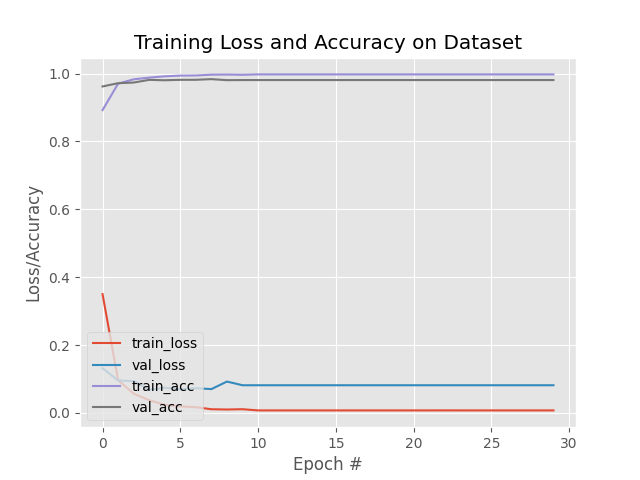

In [ ]:
from IPython.display import Image, display

image_path = "/content/plot.png"

# Display the image
display(Image(filename=image_path))

Our training history plot is smooth, demonstrating there is little overfitting happening.

### **Implementing our PyTorch prediction script**

1. Import necessary packages for data handling, image processing, and deep learning.

* **DataLoader**: Imports the DataLoader class from PyTorch, which is used for loading datasets in batches.

* **Subset**: Used to create a subset of a dataset.

* **ToTensor**: Converts images to PyTorch tensors.

* **imutils**: Provides convenience functions for OpenCV and image processing tasks.

* **cv2**: OpenCV library for computer vision tasks, particularly image and video processing.

In [ ]:
# set the numpy seed for better reproducibility
import numpy as np
np.random.seed(42)
# import the necessary packages
from torch.utils.data import DataLoader
from torch.utils.data import Subset
from torchvision.transforms import ToTensor
from torchvision.datasets import KMNIST
# import argparse
import imutils
import torch
import cv2
# instead to use cv2.imshow to display images,
# we are using cv2_imshow from colab

from google.colab.patches import cv2_imshow # function is used to display
#images in a Colab environment.

In [ ]:
# set the device we will be using to test the model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# load the KMNIST dataset and randomly grab 10 data points
print("[INFO] loading the KMNIST test dataset...")
testData = KMNIST(root="data", train=False, download=True,
	transform=ToTensor())
idxs = np.random.choice(range(0, len(testData)), size=(10,))
testData = Subset(testData, idxs)

# initialize the test data loader
testDataLoader = DataLoader(testData, batch_size=1)

# load the model and set it to evaluation mode
model = torch.load(args["model"]).to(device)
model.eval()

[INFO] loading the KMNIST test dataset...


LeNet(
  (conv1): Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))
  (relu1): ReLU()
  (maxpool1): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(20, 50, kernel_size=(5, 5), stride=(1, 1))
  (relu2): ReLU()
  (maxpool2): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=800, out_features=500, bias=True)
  (relu3): ReLU()
  (fc2): Linear(in_features=500, out_features=10, bias=True)
  (logSoftmax): LogSoftmax(dim=1)
)

### **Making predictions with our trained PyTorch model**

[INFO] ground truth label: ki, predicted label: ki


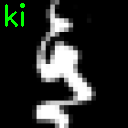

[INFO] ground truth label: ki, predicted label: ki


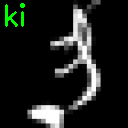

[INFO] ground truth label: ki, predicted label: ki


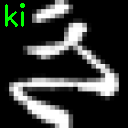

[INFO] ground truth label: ha, predicted label: ha


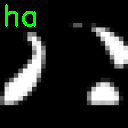

[INFO] ground truth label: tsu, predicted label: tsu


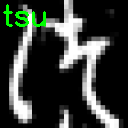

[INFO] ground truth label: ya, predicted label: ya


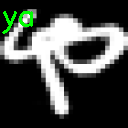

[INFO] ground truth label: tsu, predicted label: tsu


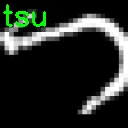

[INFO] ground truth label: na, predicted label: na


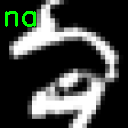

[INFO] ground truth label: ki, predicted label: ki


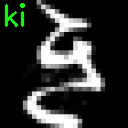

[INFO] ground truth label: tsu, predicted label: tsu


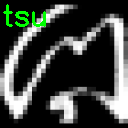

In [ ]:
# switch off autograd
with torch.no_grad():
	# loop over the test set
  for (image, label) in testDataLoader:
    #grab the original image and ground truth label
    origImage = image.numpy().squeeze(axis=(0, 1))
    gtLabel = testData.dataset.classes[label.numpy()[0]]
    # send the input to the device and make predictions on it
    image = image.to(device)
    pred = model(image)
    # find the class label index with the largest corresponding
    # probability
    idx = pred.argmax(axis=1).cpu().numpy()[0]
    predLabel = testData.dataset.classes[idx]

    # convert the image from grayscale to RGB (so we can draw on
    # it) and resize it (so we can more easily see it on our
    # screen)
    origImage = np.dstack([origImage] * 3)
    origImage = imutils.resize(origImage, width=128)
    # draw the predicted class label on it
    color = (0, 255, 0) if gtLabel == predLabel else (0, 0, 255)
    cv2.putText(origImage, gtLabel, (2, 25),
    cv2.FONT_HERSHEY_SIMPLEX, 0.95, color, 2)
    # display the result in terminal and show the input image
    print("[INFO] ground truth label: {}, predicted label: {}".format(
    gtLabel, predLabel))
    scaled_image = (origImage * 255).astype(np.uintp)
    cv2_imshow(scaled_image)
    # cv2_imshow(origImage)
    cv2.waitKey(0)
